# NEST Simulator tutorial:  Connecting neurons

In this tutorial we will create more than one neuron and connect between them. We will see the different options available to tune our network. First we will create the basic configuration previously seen and later we will connect the neurons using excitatory, inhibitory weights and long and short delays.

In first place, we initialize an standard nest simulator network creating two neurons, here called "neuron1" and "neuron2". The first will connect to the second what means an unidirectional connection.

In [1]:
import nest
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1, "print_time": False})

# Creating two neurons
neuron_params1 = {"I_e": 400.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron_params2 = {"I_e": 300.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron1 = nest.Create("iaf_psc_alpha", params=neuron_params1)
neuron2 = nest.Create("iaf_psc_alpha", params=neuron_params2)



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@41892a50f
 Built: Mar  8 2023 07:54:18

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Jul 10 11:21:05 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In this example we will use a static synapse (whose parameters keep stable over time) presenting a weight of 100 pA and a delay of 1 ms.

In [2]:
# Connecting the neurons with different connection methods
synapse_params1 = {"weight": 100.0, "delay": 1.0, "synapse_model": "static_synapse"}
nest.Connect(neuron1, neuron2, syn_spec=synapse_params1)

Finally, we connect recorder devices and simulate the network during only 100 ms. Then, we plot the raster plot indicating when the "neuron1" triggers a spike and plot the membrane potential (V_m) of the receiver "neuron2" to see how the neuron receive inputs and they are reflected in the simulation.


Jul 10 11:21:05 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Jul 10 11:21:05 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 10 11:21:05 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 10 11:21:05 SimulationManager::run [Info]: 
    Simulation finished.


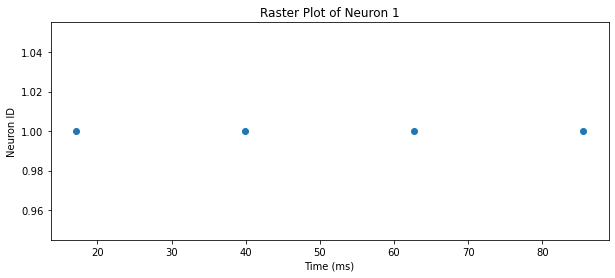

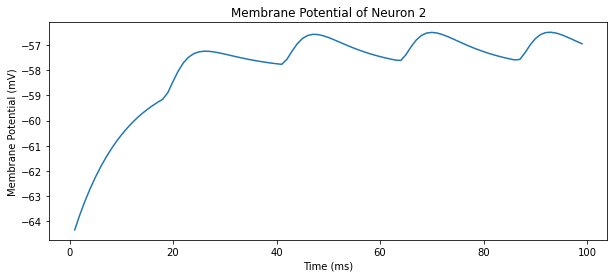

In [3]:
# Setting up recording devices
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
spike_detector = nest.Create("spike_recorder")

nest.Connect(multimeter, neuron2)
nest.Connect(neuron1, spike_detector)

# Simulating the network
simulation_time = 100.0
nest.Simulate(simulation_time)

# Plotting the raster plot of sender neuron1
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the membrane potential of receiver neuron2
membrane_potential = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential["times"], membrane_potential["V_m"])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential of Neuron 2")
plt.show()

## Exercise #1

Its your turn to tune the network! Change the weight (pA) of the connection between the "neuron1" to "neuron2" in order to obtain the latter to fire one time during the 100 ms of the simulation. (You should see that the membrane potential of the "neuron2" suddenly declines to -70 mV, i.e. the reset value).


Jul 10 11:27:41 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.

Jul 10 11:27:41 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Jul 10 11:27:41 MUSICManager::enter_runtime [Info]: 
    Entering MUSIC runtime with tick = 1 ms

Jul 10 11:27:41 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 10 11:27:41 SimulationManager::run [Info]: 
    Simulation finished.


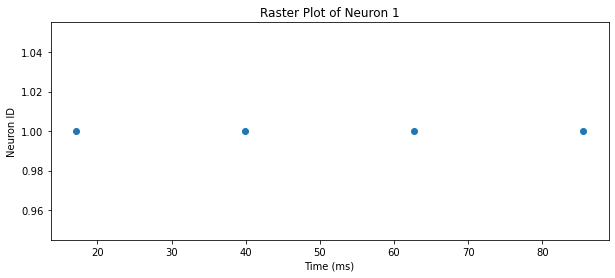

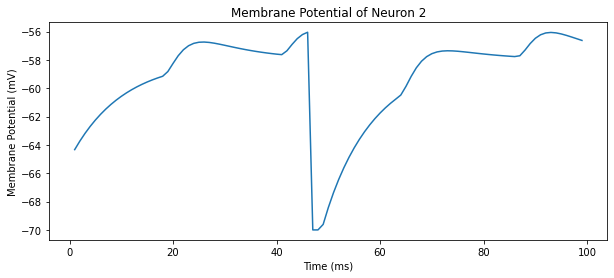

In [6]:
import nest
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1, "print_time": False})

# Creating two neurons
neuron_params1 = {"I_e": 400.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron_params2 = {"I_e": 300.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron1 = nest.Create("iaf_psc_alpha", params=neuron_params1)
neuron2 = nest.Create("iaf_psc_alpha", params=neuron_params2)

# Connecting the neurons with different connection methods
synapse_params = {"weight": 140.0, "delay": 1.0, "synapse_model": "static_synapse"}
nest.Connect(neuron1, neuron2, syn_spec=synapse_params)

# Setting up recording devices
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
spike_detector = nest.Create("spike_recorder")

nest.Connect(multimeter, neuron2)
nest.Connect(neuron1, spike_detector)

# Simulating the network
simulation_time = 100.0
nest.Simulate(simulation_time)

# Plotting the raster plot of sender neuron1
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the membrane potential of receiver neuron2
membrane_potential = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential["times"], membrane_potential["V_m"])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential of Neuron 2")
plt.show()

## Exercise #2

Now, create a basic spiking neural network containing three neurons ("iaf_psc_alpha") called: "neuron_exc", "neuron_inh", "neuron_receiver" using the following parameters {"I_e": -- , "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}. The external input current "I_e" parameter is 400 pA, 420 pA and 300 pA, respectively for the excitatory inhibitory and receiver neurons. Excitatory and inhibitory neurons are unidirectionally connected to the receiver neuron using a delay of 3 ms and weights 180 pA and -100 pA, respectively. Finally, create the appropiate recorder devices to plot the spike activity of the excitatory and inhibitory neurons and the membrane potential (V_m) of the receiver neuron.

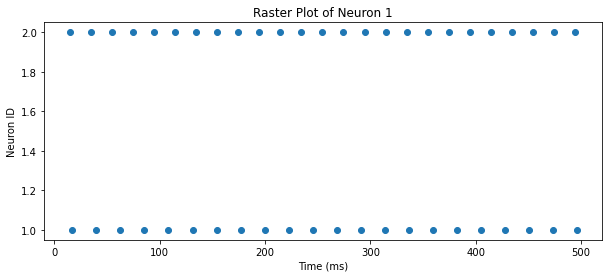

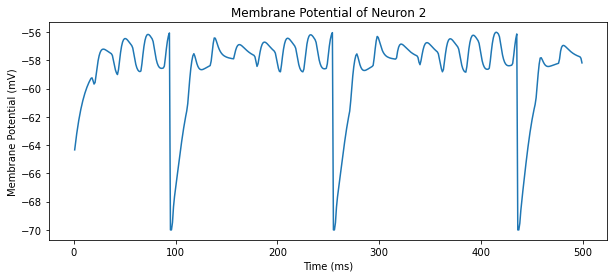

In [61]:
import nest
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1, "print_time": False})

# Creating two neurons
neuron_params1 = {"I_e": 400.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron_params2 = {"I_e": 420.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron_params3 = {"I_e": 300.0, "t_ref": 2.0, "V_reset": -70.0, "V_m": -65.0, 'V_th': -56.0}
neuron_exc = nest.Create("iaf_psc_alpha", params=neuron_params1)
neuron_inh = nest.Create("iaf_psc_alpha", params=neuron_params2)
neuron_receiver = nest.Create("iaf_psc_alpha", params=neuron_params3)

# Connecting the neurons with different connection methods
synapse_params_exc = {"weight": 180.0, "delay": 3.0, "synapse_model": "static_synapse"}
nest.Connect(neuron_exc, neuron_receiver, syn_spec=synapse_params_exc)
synapse_params_inh = {"weight": -100.0, "delay": 3.0, "synapse_model": "static_synapse"}
nest.Connect(neuron_inh, neuron_receiver, syn_spec=synapse_params_inh)

# Setting up recording devices
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
spike_detector = nest.Create("spike_recorder")

nest.Connect(multimeter, neuron_receiver)
nest.Connect(neuron_exc, spike_detector)
nest.Connect(neuron_inh, spike_detector)

# Simulating the network
simulation_time = 500.0
nest.Simulate(simulation_time)

# Plotting the raster plot of sender neuron1
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the membrane potential of receiver neuron2
membrane_potential = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential["times"], membrane_potential["V_m"])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential of Neuron 2")
plt.show()

### Hebbian learning using STDP connections (Spike Time Dependent Plasticity)

In nature, connections between neuronal cells are not stable and it usually change based on the environmental stimulation. One of the most known plastic mechanisms are the hebbian STDP rules. It can be summarised as "those firing together, are strength". If one neuron's fire makes another neuron to fire, the connection between them will be potentiated. Here we can see and example:

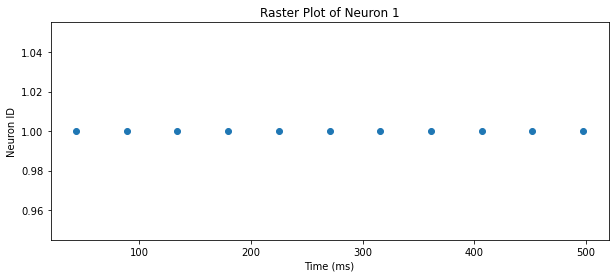

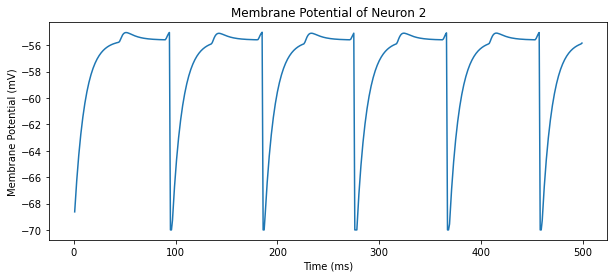

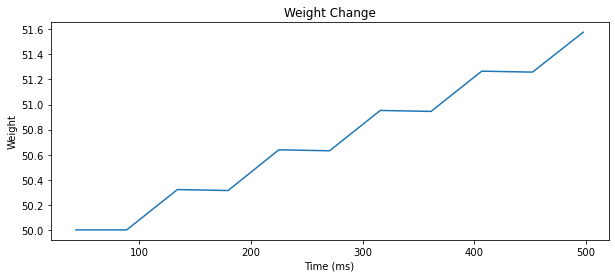

In [55]:
import nest
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1, "print_time": False})

# Creating two neurons
neuron_params1 = {"I_e": 380.0}
neuron_params2 = {"I_e": 360.0}
neuron1 = nest.Create("iaf_psc_alpha", params=neuron_params1)
neuron2 = nest.Create("iaf_psc_alpha", params=neuron_params2)

# Connecting the neurons with different connection methods
wr = nest.Create('weight_recorder')
nest.CopyModel("stdp_synapse", "stdp_synapse_rec", {"weight_recorder": wr, "weight": 50.0})
#synapse_params = {"weight": 140.0, "delay": 1.0, "synapse_model": "stdp_synapse", "weight_recorder": wr}
nest.Connect(neuron1, neuron2, syn_spec="stdp_synapse_rec")#syn_spec=synapse_params)

# Setting up recording devices
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
spike_detector = nest.Create("spike_recorder")

nest.Connect(neuron1, spike_detector)
nest.Connect(multimeter, neuron2)

# Simulating the network
simulation_time = 500.0
nest.Simulate(simulation_time)

# Plotting the raster plot of sender neuron1
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the membrane potential of receiver neuron2
membrane_potential = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential["times"], membrane_potential["V_m"])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential of Neuron 2")
plt.show()

# Getting and plotting the weight change
weight_events = nest.GetStatus(wr, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(weight_events["times"], weight_events["weights"])
plt.xlabel("Time (ms)")
plt.ylabel("Weight")
plt.title("Weight Change")
plt.show()

## Exercise #3

Do you think the plastic weight will keep rising always?
- Yes, it will keep rising more and more until an infinite number
- Not always, in some time the weight will converge in a point.
- No, the weight can only increase during certain plastic time

After you hypothesize the answer, try to find it by re-runin the code with a simulation during 20 seconds and check the final weight.

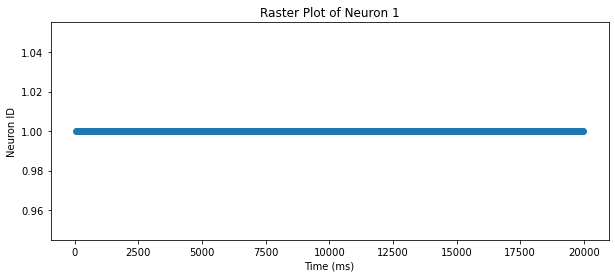

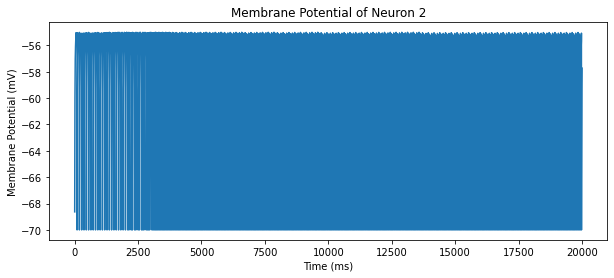

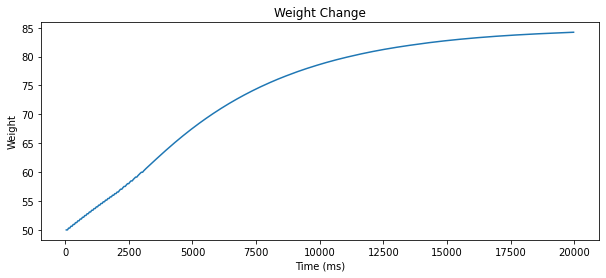

In [60]:
import nest
import matplotlib.pyplot as plt

# Setting up the NEST simulator
nest.ResetKernel()
nest.SetKernelStatus({"resolution": 0.1, "print_time": False})

# Creating two neurons
neuron_params1 = {"I_e": 380.0}
neuron_params2 = {"I_e": 360.0}
neuron1 = nest.Create("iaf_psc_alpha", params=neuron_params1)
neuron2 = nest.Create("iaf_psc_alpha", params=neuron_params2)

# Connecting the neurons with different connection methods
wr = nest.Create('weight_recorder')
nest.CopyModel("stdp_synapse", "stdp_synapse_rec", {"weight_recorder": wr, "weight": 50.0})
#synapse_params = {"weight": 140.0, "delay": 1.0, "synapse_model": "stdp_synapse", "weight_recorder": wr}
nest.Connect(neuron1, neuron2, syn_spec="stdp_synapse_rec")#syn_spec=synapse_params)

# Setting up recording devices
multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
spike_detector = nest.Create("spike_recorder")

nest.Connect(neuron1, spike_detector)
nest.Connect(multimeter, neuron2)

# Simulating the network
simulation_time = 20000.0
nest.Simulate(simulation_time)

# Plotting the raster plot of sender neuron1
spike_events = nest.GetStatus(spike_detector, "events")[0]
plt.figure(figsize=(10, 4))
plt.scatter(spike_events["times"], spike_events["senders"])
plt.xlabel("Time (ms)")
plt.ylabel("Neuron ID")
plt.title("Raster Plot of Neuron 1")
plt.show()

# Plotting the membrane potential of receiver neuron2
membrane_potential = nest.GetStatus(multimeter, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(membrane_potential["times"], membrane_potential["V_m"])
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential of Neuron 2")
plt.show()

# Getting and plotting the weight change
weight_events = nest.GetStatus(wr, "events")[0]
plt.figure(figsize=(10, 4))
plt.plot(weight_events["times"], weight_events["weights"])
plt.xlabel("Time (ms)")
plt.ylabel("Weight")
plt.title("Weight Change")
plt.show()